In [1]:
import pandas as pd

In [2]:
df_b=pd.read_csv("d:/csv-ml/boston_dataset.csv")

In [3]:
df_b=df_b.drop("Unnamed: 0",axis=1)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from mlxtend.evaluate import bias_variance_decomp

In [5]:
x=df_b.iloc[:,0:13]
y=df_b.iloc[:,13]

In [6]:
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=.2,random_state=1)

In [7]:
lm_model=LinearRegression()
mse,bias,var=bias_variance_decomp(lm_model,x_tr.values,y_tr.values,x_test.values,y_test.values,loss='mse',num_rounds=200,random_seed=1)

In [8]:
print("mse:",mse)
print("bias:",bias)
print("variance:",var)

mse: 24.288477369233178
bias: 23.19674447080956
variance: 1.0917328984236105


In [9]:
p=lm_model.predict(x_test)

In [10]:
coef=lm_model.coef_

In [11]:
c=x_tr.columns

In [12]:
dict2={"features":c,"coefficients":coef}

In [13]:
lm_coef=pd.DataFrame.from_dict(dict2)

In [14]:
lm_coef

,features,coefficients
0,crim,-0.096393
1,zn,0.093940
2,indus,-0.045615
3,chas,2.448580
4,nox,-19.384136
5,rm,2.177419
6,age,0.010374
7,dis,-1.630211
8,rad,0.468085
9,tax,-0.017705


<AxesSubplot:xlabel='features', ylabel='coefficients'>

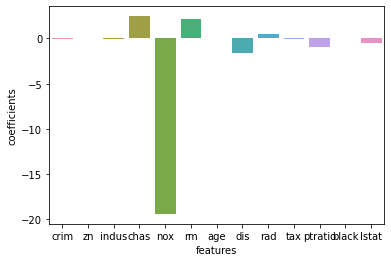

In [34]:
sns.barplot(x="features",y="coefficients",data=lm_coef)

In [15]:
r2_score(y_test,p)

0.7211463419432731

# ridge model1

In [16]:
from sklearn.linear_model import Ridge

In [17]:
ridge_model=Ridge(alpha=1)

In [18]:
ridge_model.fit(x_tr,y_tr)

Ridge(alpha=1)

In [19]:
p1=ridge_model.predict(x_test)

In [20]:
r2_score(y_test,p1)

0.7655800611077145

In [21]:
mse,bias,var=bias_variance_decomp(ridge_model,x_tr.values,y_tr.values,x_test.values,y_test.values,loss='mse',num_rounds=200,random_seed=1)

In [22]:
print("mse:",mse)
print("bias:",bias)
print("variance:",var)

mse: 24.044208210309147
bias: 22.98876782774778
variance: 1.0554403825613732


# ridge model1

In [23]:
ridge_model2=Ridge(alpha=2.0)

In [24]:
ridge_model2.fit(x_tr,y_tr)

Ridge(alpha=2.0)

In [25]:
p2=ridge_model.predict(x_test)

In [26]:
r2_score(y_test,p)

0.7211463419432731

In [27]:
mse,bias,var=bias_variance_decomp(ridge_model2,x_tr.values,y_tr.values,x_test.values,y_test.values,loss='mse',num_rounds=200,random_seed=1)

In [28]:
print("mse:",mse)
print("bias:",bias)
print("variance:",var)

mse: 24.135089459806224
bias: 23.08951925083383
variance: 1.045570208972398


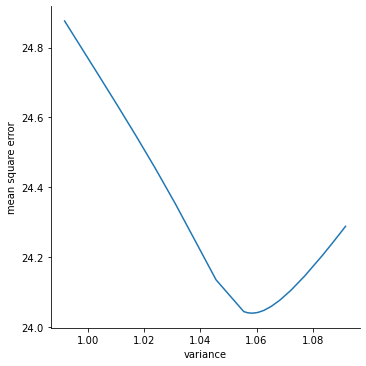

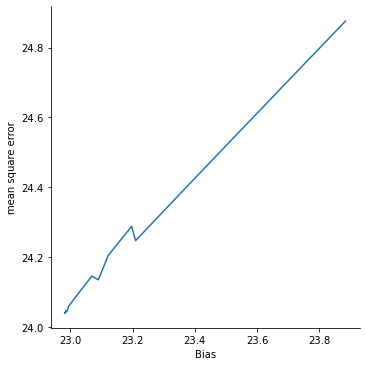

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
alpha= [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0 ]

bias1=[]
var1=[]
mse1=[]

for i in alpha:
    model=Ridge(alpha=i)
    mse,bias,var=bias_variance_decomp(model,x_tr.values,y_tr.values,x_test.values,y_test.values,loss="mse",num_rounds=200,random_seed=1)
    mse1.append(mse)
    bias1.append(bias)
    var1.append(var)
plt1=sns.relplot(x=var1,y=mse1,kind="line")
plt2=sns.relplot(x=bias1,y=mse1,kind="line")
plt1.set_xlabels("variance")
plt1.set_ylabels("mean square error")
plt1.set_titles("variance vs Means square error")

plt2.set_xlabels("Bias")
plt2.set_ylabels("mean square error")
plt2.set_titles("Bias vs Means square error")


plt.show()

In [30]:
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=1.0)
mse,bias,var=bias_variance_decomp(lasso_model,x_tr.values,y_tr.values,x_test.values,y_test.values,loss='mse',num_rounds=200,random_seed=1)

In [31]:
print("mse:",mse)
print("bias:",bias)
print("variance:",var)

mse: 35.66138701642816
bias: 34.73726034014022
variance: 0.9241266762879403


In [32]:
lasso_model.coef_

array([-0.04073648,  0.08925634, -0.08683994,  0.        , -0.        ,
        0.        ,  0.019168  , -0.85989516,  0.42340465, -0.02019791,
       -0.66135468,  0.00569898, -0.74089486])

In [36]:
lasso_coef=pd.DataFrame({"features":x_tr.columns,"coef":lasso_model.coef_})

In [37]:
lasso_coef

,features,coef
0,crim,-0.040736
1,zn,0.089256
2,indus,-0.086840
3,chas,0.000000
4,nox,-0.000000
5,rm,0.000000
6,age,0.019168
7,dis,-0.859895
8,rad,0.423405
9,tax,-0.020198


<AxesSubplot:xlabel='features', ylabel='coef'>

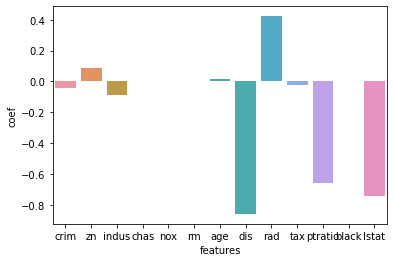

In [38]:
sns.barplot(x="features",y="coef",data=lasso_coef)